In [69]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Model selection
from sklearn.neighbors import KNeighborsClassifier
from skfuzzy.cluster import cmeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV

# Oversampling and undersampling
from imblearn.combine import SMOTETomek

# For visualizing clustering results
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# For Davis-Bouldin Index
from sklearn.metrics import davies_bouldin_score

# For feature importance with Random Forest
from sklearn.feature_selection import SelectFromModel

# Fuzzy C-Means (FCM) specific imports
from skfuzzy.cluster import cmeans, cmeans_predict

# Other utility imports
from secret import path
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Loading our dataset in pandas libraries for analysis and data manipulation if needed
data = pd.read_csv(path+"\\creditcard.csv")

# Displaying first five rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Getting summary statistics for numerical features
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Checking the data types of each column
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
# Checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
# Checking the distribution of the target variable (Class, in your case)
count = data['Class'].value_counts()
count 

Class
0    284315
1       492
Name: count, dtype: int64

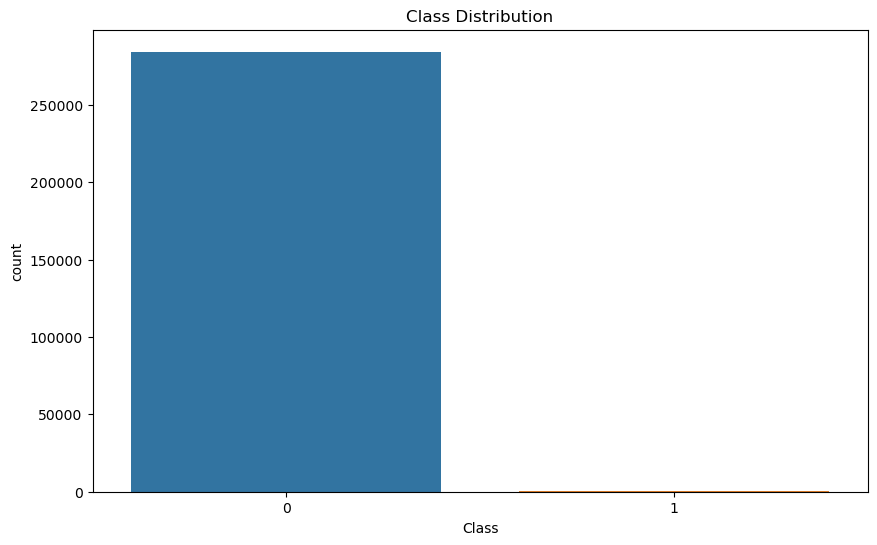

In [19]:
# Plotting the data in a bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

## **With such severe class imbalance we will have to balance the target class**
To do that we will be using **Combining Oversampling and Undersampling**:<br>
A hybrid approach that involves both oversampling the minority class and undersampling the majority class can sometimes be effective. This combination aims to balance the class distribution while retaining important data from both classes.

**Models we will be using for class balancing**<br>
Combining oversampling and undersampling techniques can help mitigate class imbalance effectively. The idea is to oversample the minority class and undersample the majority class. One common method for doing this is to apply **SMOTE** to oversample the minority class and **Tomek links** to undersample the majority class.

In [54]:
# Split the dataset into features (X) and the target (y)
X = data.drop(columns=['Class', 'Time', 'Amount'])
y = data['Class']

In [55]:
# Splitting the data into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Applying SMOTE and Tomek Link
smt = SMOTETomek(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [57]:
value_counts = y_resampled.value_counts()
# Accessing the counts for 0 and 1
count_0 = value_counts.get(0, 0)  # Geting count of 0, default to 0 if not found
count_1 = value_counts.get(1, 0)  # Geting count of 1, default to 0 if not found

print(f"Count of 0s: {count_0}")
print(f"Count of 1s: {count_1}")

Count of 0s: 190477
Count of 1s: 190477


In [58]:
# Method 1: Mutual Information for feature selection
mi_selector = SelectKBest(mutual_info_classif, k=10)
X_train_mi = mi_selector.fit_transform(X_resampled, y_resampled)
X_test_mi = mi_selector.transform(X_test)

In [59]:
# Method 2: SelectKBest (e.g., chi-squared) for feature selection
skb_selector = SelectKBest(k=10)
X_train_skb = skb_selector.fit_transform(X_resampled, y_resampled)
X_test_skb = skb_selector.transform(X_test)

In [47]:
# Method 3: Random Forest Classifier (RFC) for feature selection
# Fit a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature indices by importance
selected_feature_indices = np.argsort(feature_importances)[::-1]
selected_feature_indices = selected_feature_indices[selected_feature_indices < X_train.shape[1]]

# Select the top N features
top_N_features = X_train.columns[selected_feature_indices[:10]]

In [65]:
# Selecting the feature from datasets
# Extracting the selected features from dataset
X_train_rfc = X_resampled[top_N_features]
X_test_rfc = X_test[top_N_features]

In [78]:
# Train and evaluate a K-Nearest Neighbors (KNN) classifier using full dataset...
knn = KNeighborsClassifier(n_neighbors=5)

# Evaluating Full dataset
print("Fitting KNN with Full Dataset...")
knn.fit(X_resampled, y_resampled)
print("Predicting with Full Dataset...")
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
clr = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", clr)
print("\n\n")

Fitting KNN with Full Dataset...
Predicting with Full Dataset...
Accuracy: 0.9981061210592954
Precision: 0.45084745762711864
Recall: 0.8926174496644296
F1 Score: 0.5990990990990991
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.45      0.89      0.60       149

    accuracy                           1.00     93987
   macro avg       0.73      0.95      0.80     93987
weighted avg       1.00      1.00      1.00     93987






In [62]:
# Train and evaluate a K-Nearest Neighbors (KNN) classifier using each selected feature set
knn = KNeighborsClassifier(n_neighbors=5)

# Evaluating Mutual Information selected features
print("Fitting KNN with Mutual Information selected features...")
knn.fit(X_train_mi, y_resampled)
print("Predicting with Mutual Information selected features...")
y_pred_mi = knn.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
precision_mi = precision_score(y_test, y_pred_mi)
recall_mi = recall_score(y_test, y_pred_mi)
f1_mi = f1_score(y_test, y_pred_mi)
clr_mi = classification_report(y_test, y_pred_mi)
print("Accuracy:", accuracy_mi)
print("Precision:", precision_mi)
print("Recall:", recall_mi)
print("F1 Score:", f1_mi)
print("Classification Report:\n", clr_mi)
print("\n\n")

Fitting KNN with Mutual Information selected features...
Predicting with Mutual Information selected features...
Accuracy: 0.9966165533531233
Precision: 0.30663615560640733
Recall: 0.8993288590604027
F1 Score: 0.4573378839590444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.31      0.90      0.46       149

    accuracy                           1.00     93987
   macro avg       0.65      0.95      0.73     93987
weighted avg       1.00      1.00      1.00     93987






In [63]:
# Evaluating SelectKBest selected features
print("Fitting with SelectKBest selected features...")
knn.fit(X_train_skb, y_resampled)
print("Predicting with SelectKBest selected features...")
y_pred_skb = knn.predict(X_test_skb)
accuracy_skb = accuracy_score(y_test, y_pred_skb)
precision_skb = precision_score(y_test, y_pred_skb)
recall_skb = recall_score(y_test, y_pred_skb)
f1_skb = f1_score(y_test, y_pred_skb)
clr_skb = classification_report(y_test, y_pred_skb)
print("Accuracy:", accuracy_skb)
print("Precision:", precision_skb)
print("Recall:", recall_skb)
print("F1 Score:", f1_skb)
print("Classification Report:\n", clr_skb)
print("\n\n")


Fitting with SelectKBest selected features...
Predicting with SelectKBest selected features...
Accuracy: 0.9967655101237405
Precision: 0.31678486997635935
Recall: 0.8993288590604027
F1 Score: 0.46853146853146854
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.32      0.90      0.47       149

    accuracy                           1.00     93987
   macro avg       0.66      0.95      0.73     93987
weighted avg       1.00      1.00      1.00     93987






In [66]:
# Evaluating RFC selected features
print("Fitting with Random Forest Classifier selected features...")
knn.fit(X_train_rfc, y_resampled)
print("Predicting with Random Forest Classifier selected features...")
y_pred_rfc = knn.predict(X_test_rfc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
clr_rfc = classification_report(y_test, y_pred_rfc)
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 Score:", f1_rfc)
print("Classification Report:\n", clr_rfc)

Fitting with Random Forest Classifier selected features...
Predicting with Random Forest Classifier selected features...
Accuracy: 0.9970421441263153
Precision: 0.33159268929503916
Recall: 0.8523489932885906
F1 Score: 0.4774436090225564
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.33      0.85      0.48       149

    accuracy                           1.00     93987
   macro avg       0.67      0.92      0.74     93987
weighted avg       1.00      1.00      1.00     93987



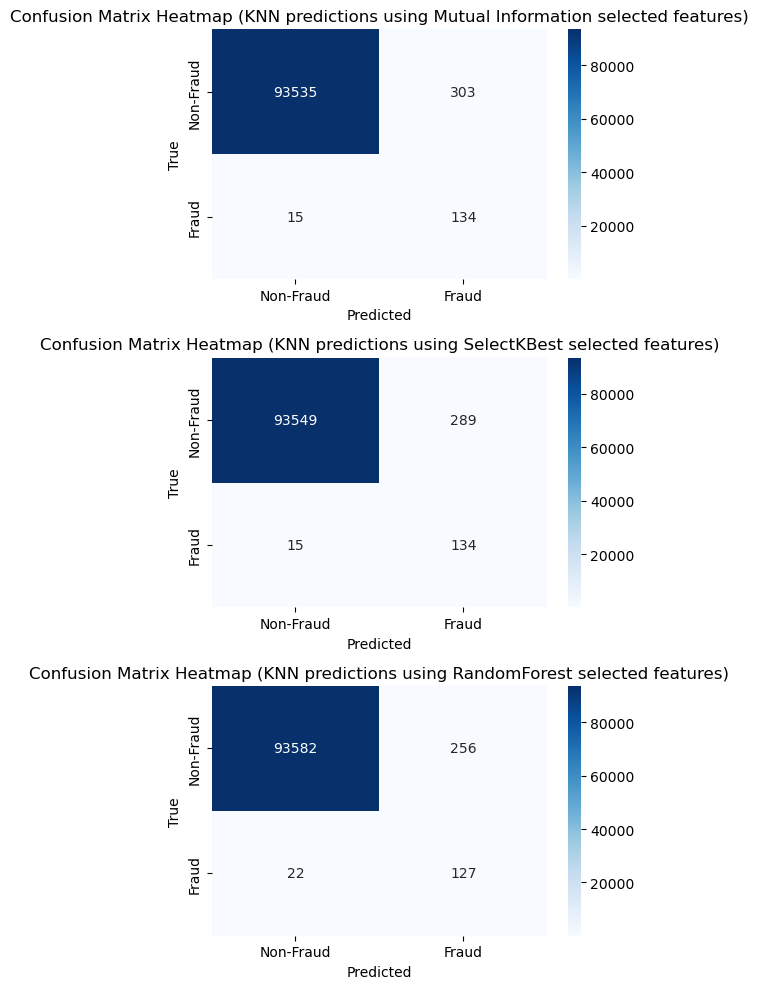

In [67]:
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

# Computing confusion matrices for KNN and Random Forest
cm_mi = confusion_matrix(y_test, y_pred_mi)
cm_skb = confusion_matrix(y_test, y_pred_skb)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# Ploting the confusion matrix for KNN predictions using Mutual Information selected features on the first subplot
sns.heatmap(cm_mi, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix Heatmap (KNN predictions using Mutual Information selected features)')

# Ploting the confusion matrix for KNN predictions using SelectKBest selected features on the second subplot
sns.heatmap(cm_skb, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix Heatmap (KNN predictions using SelectKBest selected features)')

# Ploting the confusion matrix for KNN predictions using RandomForest selected features on the second subplot
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')
axes[2].set_title('Confusion Matrix Heatmap (KNN predictions using RandomForest selected features)')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

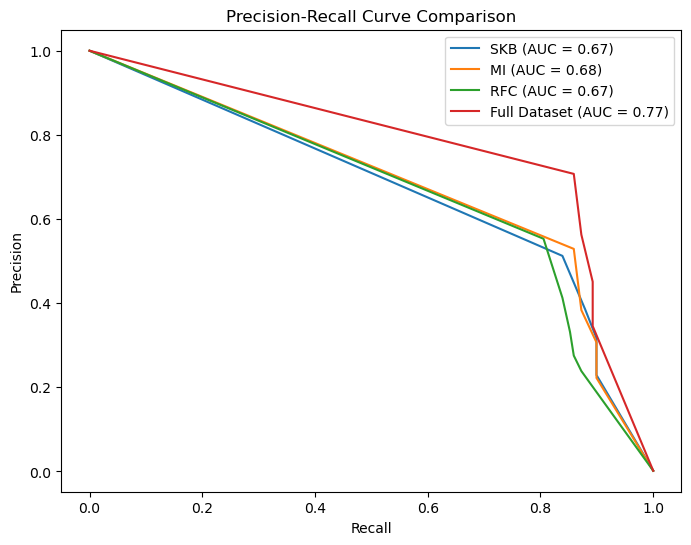

In [79]:
# Create KNN models with selected features
knn_skb = KNeighborsClassifier(n_neighbors=5).fit(X_train_skb, y_resampled)
knn_mi = KNeighborsClassifier(n_neighbors=5).fit(X_train_mi, y_resampled)
knn_rfc = KNeighborsClassifier(n_neighbors=5).fit(X_train_rfc, y_resampled)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_resampled, y_resampled)

# Compute precision-recall curves
y_scores_skb = knn_skb.predict_proba(skb_selector.transform(X_test))[:, 1]
precision_skb, recall_skb, _ = precision_recall_curve(y_test, y_scores_skb)

y_scores_mi = knn_mi.predict_proba(mi_selector.transform(X_test))[:, 1]
precision_mi, recall_mi, _ = precision_recall_curve(y_test, y_scores_mi)

y_scores_rfc = knn_rfc.predict_proba(X_test_rfc)[:, 1]
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_scores_rfc)

y_scores = knn.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score_skb = auc(recall_skb, precision_skb)
auc_score_mi = auc(recall_mi, precision_mi)
auc_score_rfc = auc(recall_rfc, precision_rfc)
auc_score = auc(recall, precision)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_skb, precision_skb, label=f'SKB (AUC = {auc_score_skb:.2f})')
plt.plot(recall_mi, precision_mi, label=f'MI (AUC = {auc_score_mi:.2f})')
plt.plot(recall_rfc, precision_rfc, label=f'RFC (AUC = {auc_score_rfc:.2f})')
plt.plot(recall, precision, label=f'Full Dataset (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.show()

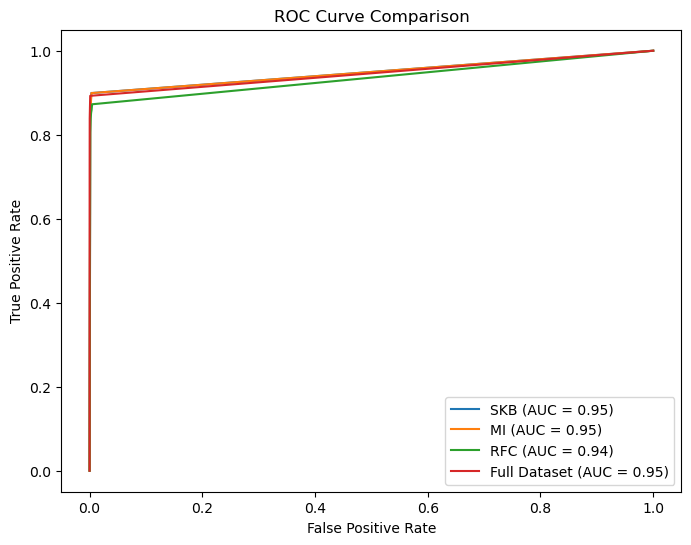

In [77]:
# Computing ROC curves
y_scores_skb = knn_skb.predict_proba(skb_selector.transform(X_test))[:, 1]
fpr_skb, tpr_skb, _ = roc_curve(y_test, y_scores_skb)

y_scores_mi = knn_mi.predict_proba(mi_selector.transform(X_test))[:, 1]
fpr_mi, tpr_mi, _ = roc_curve(y_test, y_scores_mi)

y_scores_rfc = knn_rfc.predict_proba(X_test_rfc)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_scores_rfc)

y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Compute AUC (Area Under the Curve)
auc_score_skb = roc_auc_score(y_test, y_scores_skb)
auc_score_mi = roc_auc_score(y_test, y_scores_mi)
auc_score_rfc = roc_auc_score(y_test, y_scores_rfc)
auc_score = roc_auc_score(y_test, y_scores)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_skb, tpr_skb, label=f'SKB (AUC = {auc_score_skb:.2f})')
plt.plot(fpr_mi, tpr_mi, label=f'MI (AUC = {auc_score_mi:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'RFC (AUC = {auc_score_rfc:.2f})')
plt.plot(fpr, tpr, label=f'Full Dataset (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

In [81]:
from scipy.stats import ttest_rel

# Recall values for each KNN model
recall_knn = 0.8926174496644296
recall_knn_rfc = 0.8523489932885906
recall_knn_skb = 0.8993288590604027
recall_knn_mi = 0.8993288590604027

# Perform paired t-tests for all pairwise comparisons
p_value_knn_rfc = ttest_rel([recall_knn], [recall_knn_rfc]).pvalue
p_value_knn_skb = ttest_rel([recall_knn], [recall_knn_skb]).pvalue
p_value_knn_mi = ttest_rel([recall_knn], [recall_knn_mi]).pvalue
p_value_rfc_skb = ttest_rel([recall_knn_rfc], [recall_knn_skb]).pvalue
p_value_rfc_mi = ttest_rel([recall_knn_rfc], [recall_knn_mi]).pvalue
p_value_skb_mi = ttest_rel([recall_knn_skb], [recall_knn_mi]).pvalue

# Define the significance level (alpha)
alpha = 0.05

# Compare p-values to the significance level
if p_value_knn_rfc < alpha:
    print("There is a statistically significant difference between KNN and KNN_RFC.")
else:
    print("There is no statistically significant difference between KNN and KNN_RFC.")

if p_value_knn_skb < alpha:
    print("There is a statistically significant difference between KNN and KNN_SKB.")
else:
    print("There is no statistically significant difference between KNN and KNN_SKB.")

if p_value_knn_mi < alpha:
    print("There is a statistically significant difference between KNN and KNN_MI.")
else:
    print("There is no statistically significant difference between KNN and KNN_MI.")

if p_value_rfc_skb < alpha:
    print("There is a statistically significant difference between KNN_RFC and KNN_SKB.")
else:
    print("There is no statistically significant difference between KNN_RFC and KNN_SKB.")

if p_value_rfc_mi < alpha:
    print("There is a statistically significant difference between KNN_RFC and KNN_MI.")
else:
    print("There is no statistically significant difference between KNN_RFC and KNN_MI.")

if p_value_skb_mi < alpha:
    print("There is a statistically significant difference between KNN_SKB and KNN_MI.")
else:
    print("There is no statistically significant difference between KNN_SKB and KNN_MI.")


There is no statistically significant difference between KNN and KNN_RFC.
There is no statistically significant difference between KNN and KNN_SKB.
There is no statistically significant difference between KNN and KNN_MI.
There is no statistically significant difference between KNN_RFC and KNN_SKB.
There is no statistically significant difference between KNN_RFC and KNN_MI.
There is no statistically significant difference between KNN_SKB and KNN_MI.
